In [9]:
#%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
#loading and normalizing data
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

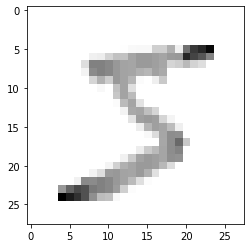

In [11]:
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()
draw(x_train[0])

In [13]:
# using a sequentioal model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2637 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1075 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0719 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0550 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0388 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0307 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0267 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0206 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0179 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

In [16]:
#Model Evaluation
val_loss,val_acc=model.evaluate(x_test,y_test)
print("loss: {}\nAccuracy: {}".format(val_loss,val_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9758
loss: 0.10394111275672913
Accuracy: 0.9757999777793884


label:  1
prediction:  1


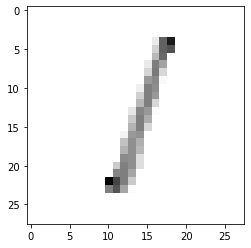

In [23]:
#Predicting

predictions=model.predict([x_test])
print('label: ',y_test[2])
print('prediction: ',np.argmax(predictions[2]))

draw(x_test[2])

In [24]:
#saving the Model

model.save('digit-recogniser.h5')

In [25]:
new_model=tf.keras.models.load_model('digit-recogniser.h5')

label:  0
prediction:  0


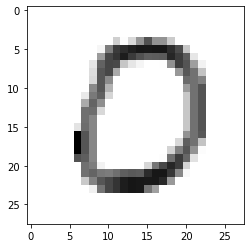

In [27]:
#prediction using new model
prediction=new_model.predict([x_test])
print('label: ',y_test[10])
print('prediction: ',np.argmax(predictions[10]))

draw(x_test[10])